<a href="https://colab.research.google.com/github/RobbySoze/Project-1/blob/main/Robert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# # Problem - 1:


In [ ]:
### Importing required libraries

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [ ]:
### Loading datasets



In [ ]:
country_dataset = pd.read_csv("housing.csv")

In [ ]:
### Show the data information




In [ ]:
country_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
### EDA

In [ ]:
#### Shapes

In [ ]:
country_dataset.shape

(20640, 10)

In [ ]:
#### Types

In [ ]:
country_dataset.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [ ]:
#### Head

In [ ]:
country_dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
#### Tail

In [ ]:
country_dataset.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [ ]:
#### Null

In [ ]:
country_dataset.isnull()
print(country_dataset.isnull().sum())

#remove rows with any values that are not finite
country_dataset = country_dataset.dropna()
print(country_dataset.isnull().sum())


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [ ]:
#### Quantiles

In [ ]:
country_dataset.quantile([0, 0.05, 0.5, .95, .99, 1])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0.00,-124.35,32.5400,1.0,2.00,1.00,3.00,1.00,0.49990,14999.0
0.05,-122.47,32.8200,8.0,622.00,137.00,348.00,125.00,1.60066,66260.0
0.50,-118.49,34.2600,29.0,2127.00,435.00,1166.00,409.00,3.53650,179700.0
0.95,-117.08,38.9600,52.0,6217.00,1275.40,3284.40,1159.00,7.30034,490560.0
0.99,-116.29,40.6268,52.0,11244.24,2221.36,5809.04,1985.68,10.59682,500001.0
1.00,-114.31,41.9500,52.0,39320.00,6445.00,35682.00,6082.00,15.00010,500001.0


In [ ]:
#### Summary

In [ ]:
country_dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
### Determining Optimal Clusters using the following methods

In [ ]:
country_dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
from sklearn.cluster import KMeans
import numpy as np
X = country_dataset.drop(['ocean_proximity'], axis=1)
kmeans = KMeans(n_clusters=2, random_state=0,).fit(X)
kmeans.labels_
kmeans.cluster_centers_


array([[-1.19469800e+02,  3.57065770e+01,  2.79625957e+01,
         2.48806057e+03,  5.29173111e+02,  1.45175534e+03,
         4.88869484e+02,  3.24267784e+00,  1.49431441e+05],
       [-1.19850986e+02,  3.54294175e+01,  3.04959320e+01,
         3.04892400e+03,  5.62034578e+02,  1.35046542e+03,
         5.28783284e+02,  5.61727265e+00,  3.66429948e+05]])

In [ ]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
data_scaled = scaler.fit_transform(X)

In [ ]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')
# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)
# inertia on the fitted data
kmeans.inertia_

140466.39728546067

In [ ]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

In [ ]:
#### Elbow

Text(0, 0.5, 'Inertia')

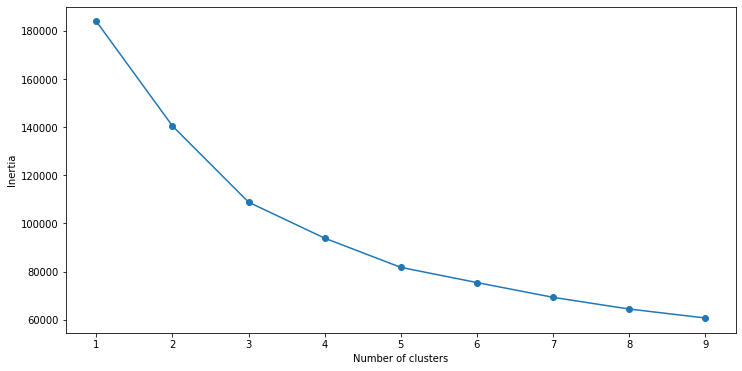

In [ ]:
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
#let us take 5

In [ ]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    8093
3    6689
0    2794
2    2581
4     276
Name: cluster, dtype: int64

In [ ]:
#### Silhouette Method

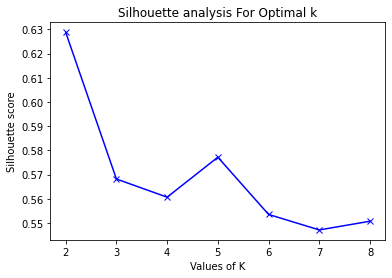

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
  # initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(X)
  cluster_labels = kmeans.labels_
  
  # silhouette score
  silhouette_avg.append(silhouette_score(X, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [ ]:
#So k here is 5

# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

2    8093
0    6689
1    2794
4    2581
3     276
Name: cluster, dtype: int64

In [ ]:
### Final Graph

In [ ]:
df = X
df.head()

from sklearn.cluster import KMeans
import numpy as np# k means
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(X)# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,cluster,cen_x,cen_y
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,0.867910,-119.570653,35.633275
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,0.911203,0.122330,0.308190
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,-119.843015,35.306311
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,0.000000,-119.573124,35.306311
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,1.000000,-119.573124,35.394287
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,2.000000,-119.484175,35.946379
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,2.000000,-119.484175,35.946379


In [ ]:
#### We have to choose two field with maximum standard deviation

#### So we chose median_house_value and total_rooms

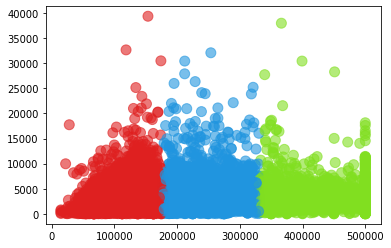

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['median_house_value'], df['total_rooms'], c=df.c, alpha = 0.6, s=100,)

In [ ]:
# # Problem -2:

# Problem-2 [Multi-Layer NN]:

# You can get information about the "seeds_dataset" at (https://archive.ics.uci.edu/ml/datasets/seeds)"

# The seed kernels belonging to three different varieties of wheat:

#     Kama
#     Rosa
#     Canadian

#  

# The NN architecture should be as follows:

#     Layer-1: Input features
#     Layer-2 (First Hidden Layer): 14 hidden nodes
#     Layer-3 (First Hidden Layer): 10 hidden nodes
#     Layer-4 (First Hidden Layer): 14 hidden nodes
#     Output layer:

#  

# Work to do:

#     You should use 80% of the records for training and remaining records for testing.
#     For each of the independent features generate the scattered graphs (x, y plot).
#     Analyze accuracy, FPR, FNR, and CM of your multilayer NN model.


In [ ]:
## Import libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
## First clean the dataset of spaces

In [ ]:
df = pd.read_csv('seeds_dataset.txt', sep="\t", )
print(df.shape)
df.head()

(210, 8)


,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,seed type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [ ]:
##You should use 80% of the records for training and remaining records for testing. 

In [ ]:
X=df.drop('seed type',axis=1)
y=df['seed type']
print(y.values)
Xt,X_test,yt,y_test=train_test_split(X,y,random_state=3,test_size=0.20)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [ ]:
## Reshaping

In [ ]:
def reshape_me(y):
  new_y = []
  for i in y:
    row = []
    for j in range(1,4):
      if (i == j):
        row.append(1)
      else:
        row.append(0)
    new_y.append(row)

  new_y = np.array(new_y)
  return new_y



In [ ]:
def reshape_me_again(y):
  result = []
  for i in y:
    row = []
    for j in range(len(i)):
      k = i[j]
      if k == 1:
        result.append(j + 1)

  result = np.array(result)
  return result

In [ ]:
y = reshape_me(y)
yt = reshape_me(yt)

print(y)

In [ ]:
print(y.shape, yt.shape)

NameError: ignored

In [ ]:
## Functions to create Multi Layer Architecture and initialise weights

In [ ]:
def init(inp,out):
    return np.random.randn(inp,out)/np.sqrt(inp)

def create_arch(input_layer,first_layer, second_layer, third_layer, output_layer,random_seed=0):
    np.random.seed(random_seed)
    layers=input_layer.shape[1],first_layer, second_layer, third_layer, output_layer
    arch=list(zip(layers[:-1],layers[1:]))
    weights=[init(inp,out) for inp,out in arch]
    return weights

In [ ]:
## Activation Functions

In [ ]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def sigmoid_prime(s):
    return s*(1-s)

In [ ]:
## Function to implement Feed Forward processing in a Network

In [ ]:
def feed_forward(X,weights):
    a=X.copy()
    out=list()
    for w in weights:
        z=np.dot(a,w)
        a=sigmoid(z)
        out.append(a)
    return out

In [ ]:
## Accuracy check

In [ ]:
def accuracy(true_label,predicted):
  print(true_label.shape, predicted.shape)
  # correct_preds=np.ravel(predicted)==true_label
  correct_preds = []
  for i in range(true_label.shape[0]):
    true_value = true_label[i]
    pred_value = (predicted[i].max() == predicted[i]) + 0
    # print(true_value, pred_value, true_value == pred_value)
    check = (true_value == pred_value).all()
    correct_preds.append(check)
  return np.sum(correct_preds)/true_label.shape[0]

In [ ]:
def decision_function(predicted):
  correct_preds = []
  for i in range(predicted.shape[0]):
    pred_value = (predicted[i].max() == predicted[i]) + 0
    correct_preds.append(pred_value)
  return np.array(correct_preds)

In [ ]:
## Back Propagation function to calculate error in the network

In [ ]:
def backpropagation(l1,l2,l3,l4, weights,y):
  l4_error=y - l4
  l4_delta=l4_error*sigmoid_prime(l4)

  l3_error=l4_delta.dot(weights[3].T)
  l3_delta=l3_error*sigmoid_prime(l3)

  l2_error=l3_delta.dot(weights[2].T)
  l2_delta=l2_error*sigmoid_prime(l2)

  l1_error=l2_delta.dot(weights[1].T)
  l1_delta=l1_error*sigmoid_prime(l1)

  return l4_error, l4_delta, l3_error, l3_delta, l2_error, l2_delta, l1_error, l1_delta


In [ ]:
## Update the weights accordingly

In [ ]:
def update_weights(X, l1, l2, l3, l1_delta, l2_delta, l3_delta, l4_delta, weights, alpha=1.0):
    weights[3]+=(alpha*l3.T.dot(l4_delta))
    weights[2]+=(alpha*l2.T.dot(l3_delta))
    weights[1]+=(alpha*l1.T.dot(l2_delta))
    weights[0]+=(alpha*X.T.dot(l1_delta))
    return weights


In [ ]:
## Prediction using trained weights

In [ ]:
def predict(X,weights):
    l1,l2,l3,l4=feed_forward(X,weights)
    return l4
    preds=np.ravel((l4).astype(int))
    return preds


In [ ]:
# ## Creating a Network 

# The NN architecture should be as follows:

#     Layer-1: Input features
#     Layer-2 (First Hidden Layer): 14 hidden nodes
#     Layer-3 (First Hidden Layer): 10 hidden nodes
#     Layer-4 (First Hidden Layer): 14 hidden nodes
#     Output layer:


# Training it on our Data, Testing the model

In [ ]:
weights=create_arch(X, 14, 10, 14, 3)
# print(len(weights))
# print(weights)

for j in range(3000 + 1):
    l1, l2, l3 , l4 = feed_forward(X,weights)
    l4_error, l4_delta, l3_error, l3_delta, l2_error, l2_delta, l1_error, l1_delta = backpropagation(l1, l2, l3, l4, weights, y)
    weights=update_weights(X,l1, l2, l3,l1_delta,l2_delta,l3_delta, l4_delta,weights,alpha=0.05)
    if(j%500==0):        
        train_accuracy=accuracy(true_label=y,predicted=l4)
        print("epoch {:5} ".format(j),end='-')
        print(train_accuracy)
        test_preds=predict(Xt,weights)
        test_accuracy=accuracy(true_label=yt,predicted=test_preds)
        print(" acc:train {:0.3f} ".format(train_accuracy),end="|")
        print(" test {:0.3f} ".format(test_accuracy))

        test_pred_values = decision_function(test_preds)
        y_true = reshape_me_again(yt)
        y_pred = reshape_me_again(test_pred_values)
        test_cm =confusion_matrix(y_true, y_pred)
        print(test_cm)

        FP = test_cm.sum(axis=0) - np.diag(test_cm)  
        FN = test_cm.sum(axis=1) - np.diag(test_cm)
        TP = np.diag(test_cm)
        TN = test_cm.sum() - (FP + FN + TP)

        FPR = FP/(FP+TN)
        FNR = FN/(TP+FN)

        print("FPR")
        print(FPR)

        print("FNR")
        print(FPR)

(210, 3) (210, 3)
epoch     0 -0.3333333333333333
(168, 3) (168, 3)
 acc:train 0.333 | test 0.339 
[[ 0  0 55]
 [ 0  0 56]
 [ 0  0 57]]
FPR
[0. 0. 1.]
FNR
[0. 0. 1.]
(210, 3) (210, 3)
epoch   500 -0.3333333333333333
(168, 3) (168, 3)
 acc:train 0.333 | test 0.565 
[[40  0 15]
 [45  0 11]
 [ 2  0 55]]
FPR
[0.4159292  0.         0.23423423]
FNR
[0.4159292  0.         0.23423423]
(210, 3) (210, 3)
epoch  1000 -0.36666666666666664
(168, 3) (168, 3)
 acc:train 0.367 | test 0.494 
[[36 19  0]
 [23 33  0]
 [43  0 14]]
FPR
[0.5840708  0.16964286 0.        ]
FNR
[0.5840708  0.16964286 0.        ]
(210, 3) (210, 3)
epoch  1500 -0.6190476190476191
(168, 3) (168, 3)
 acc:train 0.619 | test 0.685 
[[ 4 45  6]
 [ 0 56  0]
 [ 0  2 55]]
FPR
[0.         0.41964286 0.05405405]
FNR
[0.         0.41964286 0.05405405]
(210, 3) (210, 3)
epoch  2000 -0.5857142857142857
(168, 3) (168, 3)
 acc:train 0.586 | test 0.619 
[[ 0 55  0]
 [ 0 56  0]
 [ 3  6 48]]
FPR
[0.02654867 0.54464286 0.        ]
FNR
[0.02654867 

In [ ]:
## For each of the independent features generate the scattered graphs (x, y plot). 

In [ ]:
###Area

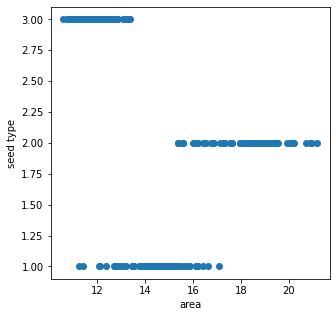

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(5,5))
plt.xlabel("area")
plt.ylabel("seed type")
plt.scatter(df["area"], df["seed type"])

In [ ]:
### Perimeter

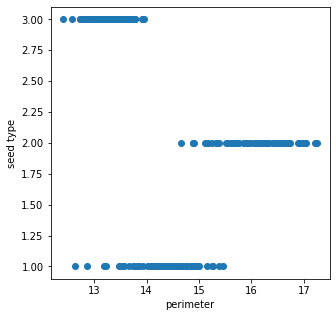

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(5,5))
plt.xlabel("perimeter")
plt.ylabel("seed type")
plt.scatter(df["perimeter"], df["seed type"])

In [ ]:
### Compactness

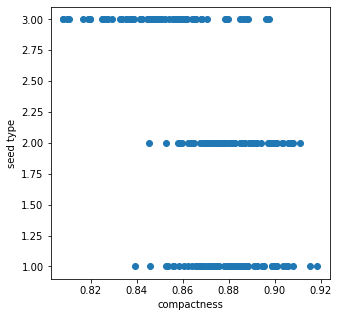

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(5,5))
plt.xlabel("compactness")
plt.ylabel("seed type")
plt.scatter(df["compactness"], df["seed type"])

In [ ]:
###  length of kernel

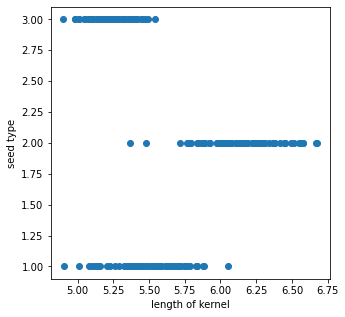

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(5,5))
plt.xlabel("length of kernel")
plt.ylabel("seed type")
plt.scatter(df["length of kernel"], df["seed type"])

In [ ]:
### width of kernel

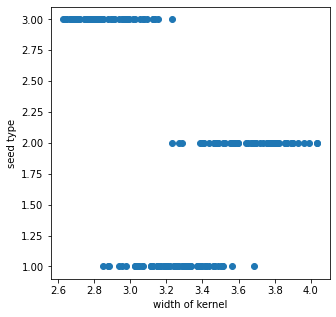

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(5,5))
plt.xlabel("width of kernel")
plt.ylabel("seed type")
plt.scatter(df["width of kernel"], df["seed type"])

In [ ]:
### asymmetry coefficient

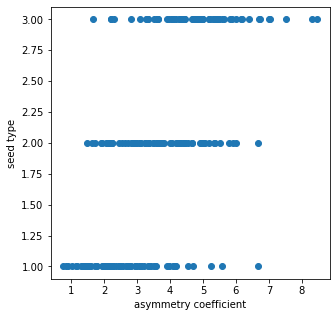

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(5,5))
plt.xlabel("asymmetry coefficient")
plt.ylabel("seed type")
plt.scatter(df["asymmetry coefficient"], df["seed type"])

In [ ]:
### length of kernel groove

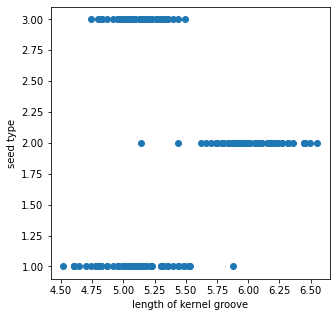

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(5,5))
plt.xlabel("length of kernel groove")
plt.ylabel("seed type")
plt.scatter(df["length of kernel groove"], df["seed type"])

In [ ]:
## Analyze accuracy, FPR, FNR, and CM of your multilayer NN model.

In [ ]:
test_pred_values = decision_function(test_preds)
y_true = reshape_me_again(yt)
y_pred = reshape_me_again(test_pred_values)
test_cm =confusion_matrix(y_true, y_pred)

print("Confusion Matrix")
print(test_cm)

FP = test_cm.sum(axis=0) - np.diag(test_cm)  
FN = test_cm.sum(axis=1) - np.diag(test_cm)
TP = np.diag(test_cm)
TN = test_cm.sum() - (FP + FN + TP)

FPR = FP/(FP+TN)
FNR = FN/(TP+FN)

print("Final FPR")
print(FPR)

print("Final FNR")
print(FNR)



Confusion Matrix
[[ 1 52  2]
 [ 0 56  0]
 [ 1  2 54]]
Final FPR
[0.00884956 0.48214286 0.01801802]
Final FNR
[0.98181818 0.         0.05263158]
